## Classification case study:
## CLASSIFYING PERSONAL INCOME
Problem statement
* Subsidy Inc. delivers subsidies to individuals based on their income
* Accurate income data is one of the hardest piece of data to obtain across the world
* Subsidy Inc. has obtained a large data set of authenticated data on individual income, demographic parameters, and a few financial parameters.

The Objective is to:
* Develop an income classifier system for individuals.

In [191]:
import pandas as pd                                           #to work with dataframes
import numpy as np                                            #To perform numerical operations
import seaborn as sns                                         #To visualize data
from sklearn.model_selection import train_test_split          #To partition the data
from sklearn.linear_model import LogisticRegression           #Importing library for logistic regression
from sklearn.metrics import accuracy_score,confusion_matrix   #Importing performance metrics - accuracy score & confusion matrix

#### import the data

In [192]:
data_income=pd.read_csv("income.csv")

Copying the original data to another variable using deep copy so that no changes are done to the original data :

In [193]:
# Creating a copy of original data
data=data_income.copy()
data.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


### Exploratory data analysis:
#### 1. Getting to know the data

In [194]:
#To check variables' data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [195]:
#Check for missing values 
data.isnull()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,False,False,False,False,False,False,False,False,False,False,False,False,False
31974,False,False,False,False,False,False,False,False,False,False,False,False,False
31975,False,False,False,False,False,False,False,False,False,False,False,False,False
31976,False,False,False,False,False,False,False,False,False,False,False,False,False


Here, False represents that there are no null values in the table

In [196]:
print('Data columns with null values:\n', data.isnull().sum())

Data columns with null values:
 age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64


No missing values !

In [197]:
#Summary of numerical variables
summary_num=data.describe()
summary_num

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [198]:
#Summary of categorical variables
summary_cate=data.describe(include="O")
summary_cate

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [199]:
#Frequency of each categories
data['JobType'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [200]:
data['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [201]:
#Checking for unique classes
np.unique(data['JobType'])

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [202]:
np.unique(data['occupation'])

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

There exists ' ?' instesd of nan. "na_values[' ?']" to be considerd as nan 

In [203]:
data= pd.read_csv("income.csv",na_values=[" ?"])

#### 2. Data pre-processing

In [204]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

Thus, JobType attribute has 1809 null data and occuation attribute has 1816 null data.

In [205]:
missing=data[data.isnull().any(axis=1)]

axis=1 => to consider at least one column value is missing in a row

In [206]:
data2=data.dropna(axis=0)

In [207]:
data3 = data2.copy()
data4 = data3.copy()

In [208]:
# Realtionship between independent variables
correlation = data2.corr()
correlation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


#### 3. Cross tables & Data Visualization

In [209]:
# Extracting the column names
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

Gender proportion table:

In [210]:
gender=pd.crosstab(index=data2["gender"],columns='count',normalize=True)
gender

col_0,count
gender,
Female,0.324315
Male,0.675685


In [211]:
# Gender vs Salary Status:
gender_salstat = pd.crosstab(index = data2["gender"], columns = data2['SalStat'], margins = True, normalize ='index') 
# Include row and column totals
print(gender_salstat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


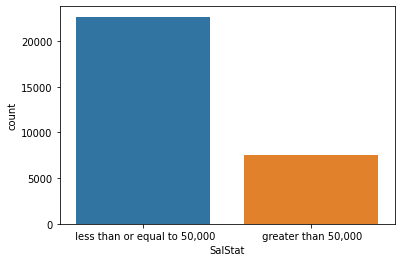

In [212]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Frequency distribution of 'Salary status'
SalStat = sns.countplot(data2['SalStat'])

75 % of people's salary status is <=50,000 & 25% of people's salary status is > 50,000

<AxesSubplot:xlabel='age'>

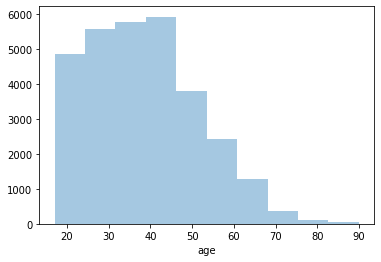

In [213]:
# Histogram of Age
sns.distplot(data2['age'], bins=10, kde=False)

People with age 20-45 age are high in frequency

SalStat
 greater than 50,000             43.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

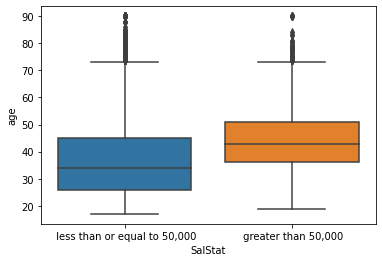

In [214]:
# Box Plot - Age vs Salary status
sns.boxplot('SalStat', 'age', data=data2)
data2.groupby('SalStat')['age'].median()

people with 35-50 age are more likely to earn > 50000 USD p.a &
people with 25-35 age are more likely to earn <= 50000 USD p.a

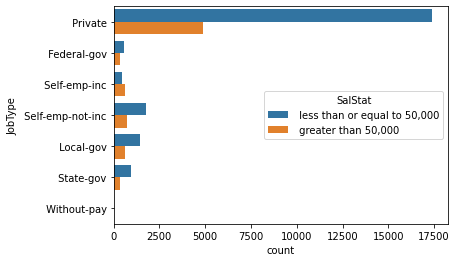

In [215]:
#Jobtype
JobType = sns.countplot(y=data2['JobType'],hue = 'SalStat', data=data2)

In [216]:
job_salstat =pd.crosstab(index = data2["JobType"],columns = data2['SalStat'], margins = True, normalize =  'index')  
round(job_salstat*100,1)

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,38.7,61.3
Local-gov,29.5,70.5
Private,21.9,78.1
Self-emp-inc,55.9,44.1
Self-emp-not-inc,28.6,71.4
State-gov,26.9,73.1
Without-pay,0.0,100.0
All,24.9,75.1


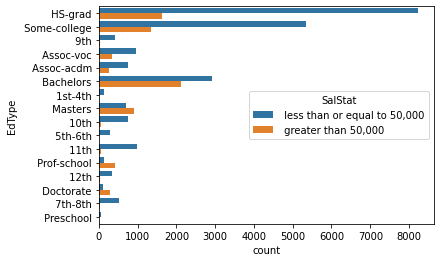

In [217]:
#Education
Education = sns.countplot(y=data2['EdType'],hue = 'SalStat', data=data2)

In [218]:
EdType_salstat = pd.crosstab(index = data2["EdType"], columns = data2['SalStat'],margins = True,normalize ='index')  
round(EdType_salstat*100,1)

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,7.2,92.8
11th,5.6,94.4
12th,7.7,92.3
1st-4th,4.0,96.0
5th-6th,4.2,95.8
7th-8th,6.3,93.7
9th,5.5,94.5
Assoc-acdm,25.4,74.6
Assoc-voc,26.3,73.7


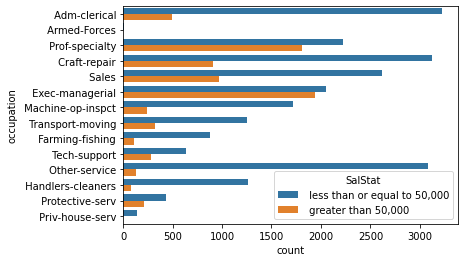

In [219]:
#Occupation
Occupation= sns.countplot(y=data2['occupation'],hue = 'SalStat', data=data2)

In [220]:
occ_salstat = pd.crosstab(index = data2["occupation"], columns =data2['SalStat'],margins = True,normalize = 'index')  
round(occ_salstat*100,1)

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,13.4,86.6
Armed-Forces,11.1,88.9
Craft-repair,22.5,77.5
Exec-managerial,48.5,51.5
Farming-fishing,11.6,88.4
Handlers-cleaners,6.1,93.9
Machine-op-inspct,12.5,87.5
Other-service,4.1,95.9
Priv-house-serv,0.7,99.3


<AxesSubplot:xlabel='capitalgain'>

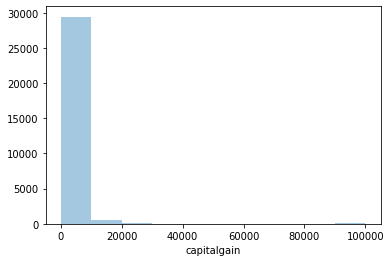

In [221]:
#Capital gain
sns.distplot(data2['capitalgain'], bins = 10, kde = False)

<AxesSubplot:xlabel='capitalloss'>

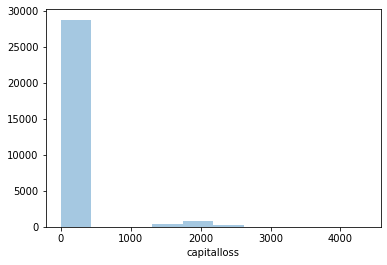

In [222]:
sns.distplot(data2['capitalloss'], bins = 10, kde = False)

### LOGISTIC REGRESSION - MODEL

In [223]:
pd.options.mode.chained_assignment = None
# Reindexing the salary status names to 0,1
data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(data2['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


In [224]:
new_data=pd.get_dummies(data2, drop_first=True)

In [225]:
# Storing the column names 
columns_list=list(new_data.columns)
columns_list

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStat',
 'JobType_ Local-gov',
 'JobType_ Private',
 'JobType_ Self-emp-inc',
 'JobType_ Self-emp-not-inc',
 'JobType_ State-gov',
 'JobType_ Without-pay',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Pr

In [226]:
# Separating the input names from data
features=list(set(columns_list)-set(['SalStat']))
features

['EdType_ 12th',
 'nativecountry_ Hungary',
 'nativecountry_ France',
 'nativecountry_ Ireland',
 'occupation_ Exec-managerial',
 'occupation_ Prof-specialty',
 'relationship_ Wife',
 'nativecountry_ Greece',
 'race_ Black',
 'nativecountry_ Vietnam',
 'JobType_ Private',
 'EdType_ 1st-4th',
 'JobType_ State-gov',
 'EdType_ HS-grad',
 'nativecountry_ Scotland',
 'maritalstatus_ Married-civ-spouse',
 'nativecountry_ Honduras',
 'nativecountry_ Taiwan',
 'nativecountry_ Jamaica',
 'EdType_ 11th',
 'occupation_ Tech-support',
 'maritalstatus_ Separated',
 'nativecountry_ Puerto-Rico',
 'relationship_ Other-relative',
 'EdType_ Bachelors',
 'EdType_ Assoc-voc',
 'nativecountry_ China',
 'nativecountry_ India',
 'nativecountry_ Dominican-Republic',
 'nativecountry_ Laos',
 'nativecountry_ Outlying-US(Guam-USVI-etc)',
 'maritalstatus_ Married-spouse-absent',
 'nativecountry_ Ecuador',
 'EdType_ 5th-6th',
 'maritalstatus_ Never-married',
 'EdType_ 9th',
 'maritalstatus_ Widowed',
 'occupation

In [227]:
# Storing the output values in y
y=new_data['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [228]:
# Storing the values from input features
x = new_data[features].values
print(x)

[[0 0 0 ... 0 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 0 1 1]
 ...
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 1 1]]


In [229]:
# Splitting the data into train and test
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3, random_state=0)

In [230]:
# Make an instance of the Model
logistic = LogisticRegression()

In [231]:
# Fitting the values for x and y
logistic=LogisticRegression(max_iter=3000)
logistic.fit(train_x, train_y)
logistic.coef_
logistic.intercept_

array([-3.52348702])

In [232]:
# Prediction from test data
prediction = logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 0]


In [233]:
# Confusion matrix
confusion_matrix = confusion_matrix(test_y, prediction)
print(confusion_matrix)

[[6304  519]
 [ 908 1318]]


In [234]:
# Calculating the accuracy
accuracy_score=accuracy_score(test_y, prediction)
print(accuracy_score)

0.8423030169079456


accuracy obtained from the Linear Regression Model is around 84.2303030169079456%

In [235]:
# Printing the misclassified values from prediction
print('Misclassified samples: %d' % (test_y != prediction).sum())

Misclassified samples: 1427


#### LOGISTIC REGRESSION - REMOVING INSIGNIFICANT VARIABLES :

In [236]:
# Reindexing the salary status names to 0,1
data3['SalStat']=data3['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(data3['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


In [237]:
cols = ['gender','nativecountry','race','JobType']
new_data = data3.drop(cols,axis = 1)
new_data=pd.get_dummies(new_data, drop_first=True)

In [238]:
# Storing the column names 
columns_list2=list(new_data.columns)
print(columns_list2)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'occupation_ Transport-moving', 'relationship_ Not-in-family', 'relationship_ Other-rel

In [239]:
# Separating the input names from data
features2=list(set(columns_list2)-set(['SalStat']))
print(features2)

['EdType_ 12th', 'EdType_ Preschool', 'occupation_ Exec-managerial', 'occupation_ Prof-specialty', 'occupation_ Machine-op-inspct', 'relationship_ Wife', 'age', 'relationship_ Unmarried', 'capitalloss', 'EdType_ 1st-4th', 'hoursperweek', 'EdType_ Masters', 'EdType_ HS-grad', 'occupation_ Protective-serv', 'capitalgain', 'occupation_ Sales', 'relationship_ Not-in-family', 'maritalstatus_ Married-civ-spouse', 'EdType_ Assoc-acdm', 'EdType_ 11th', 'EdType_ Prof-school', 'occupation_ Other-service', 'occupation_ Tech-support', 'maritalstatus_ Separated', 'maritalstatus_ Married-AF-spouse', 'occupation_ Priv-house-serv', 'relationship_ Other-relative', 'EdType_ Bachelors', 'EdType_ Assoc-voc', 'occupation_ Transport-moving', 'EdType_ 7th-8th', 'maritalstatus_ Married-spouse-absent', 'EdType_ 5th-6th', 'occupation_ Armed-Forces', 'maritalstatus_ Never-married', 'EdType_ 9th', 'maritalstatus_ Widowed', 'EdType_ Doctorate', 'occupation_ Farming-fishing', 'occupation_ Craft-repair', 'occupation

In [240]:
# Storing the output values in y
y2=new_data['SalStat'].values
print(y2)

[0 0 1 ... 0 0 0]


In [241]:
# Storing the values from input features
x2 = new_data[features2].values
print(x2)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


In [242]:
# Splitting the data into train and test
train_x2,test_x2,train_y2,test_y2 = train_test_split(x2,y2,test_size=0.3, random_state=0)

In [243]:
# Make an instance of the Model
logistic2 = LogisticRegression()

In [244]:
# Fitting the values for x and y
logistic2=LogisticRegression(max_iter=3000)
logistic2.fit(train_x2,train_y2)

LogisticRegression(max_iter=3000)

In [245]:
# Prediction from test data
prediction2 = logistic2.predict(test_x2)

In [265]:
accuracy_score=accuracy_score(test_y, prediction)
print(accuracy_score)

0.8350093933031274


Thus, here we can see that there has been a slight decrease in accuracy obtained from Linear Regression Model after removing the insignificant values from the data

In [157]:
# Printing the misclassified values from prediction
print('Misclassified samples: %d' % (test_y2 != prediction2).sum())

Misclassified samples: 1445


This is the performance of the Logistric Regression Model

### KNN - MODEL

In [249]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix

In [250]:
KNN_classifier = KNeighborsClassifier(n_neighbors=5)

In [251]:
KNN_classifier.fit(train_x,train_y)

KNeighborsClassifier()

In [252]:
prediction = KNN_classifier.predict(test_x)

In [253]:
#Performance Metrics check
confusion_matrix = confusion_matrix(test_y, prediction)

In [254]:
print("\t","Predicted Values")
print("Original values","\n",confusion_matrix)

	 Predicted Values
Original values 
 [[6173  650]
 [ 843 1383]]


In [185]:
# Calculating the accuracy
accuracy_score=accuracy_score(test_y, prediction)
print(accuracy_score)

0.8350093933031274


Here KNN provides a less accuracy score than 

In [255]:
# Printing the misclassified values from prediction
print('Misclassified samples: %d' % (test_y != prediction).sum())

Misclassified samples: 1493


#### Effect of K value on classifier

In [262]:
Misclassified_sample = []

In [263]:
# Calculating error for K vales 1 and 20
for i in range(1, 20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    pred_i=knn.predict(test_x)
    Misclassified_sample.append((test_y != pred_i).sum())

In [264]:
print(Misclassified_sample)

[1766, 1516, 1515, 1436, 1493, 1438, 1451, 1432, 1458, 1436, 1441, 1447, 1451, 1423, 1413, 1390, 1424, 1396, 1434]


### RESULT :


Thus, the data system has been Simplified by reducing the number of variables to be studied, without sacrificing too much of accuracy. Such a system would help Subsidy Inc. in planning subsidy outlay, monitoring and preventing misuse.